In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
data = pd.read_csv('flight_price.csv')

In [204]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [206]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [207]:
data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [208]:
data[data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [209]:
# Only one row is Null we can drop it

In [210]:
data=data[~data['Route'].isnull()]

or we can do like this 

data = data.dropna(subset=['Route'])

data = data.drop(index=9039)


In [211]:
data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

In [212]:
# Data Preprocessing - Using the present data and converting into A valuable value from that we can draw insights

In [213]:
data["Journey_day"]=pd.to_datetime(data['Date_of_Journey'],dayfirst=True).dt.day

In [214]:
data["Journey_month"] = pd.to_datetime(data['Date_of_Journey'],dayfirst=True).dt.month

In [215]:
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [216]:
data['dep_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour

C:\Users\vishn\AppData\Local\Temp\ipykernel_7152\1753458957.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['dep_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour


In [217]:
data['dep_min'] = pd.to_datetime(data['Dep_Time']).dt.minute

C:\Users\vishn\AppData\Local\Temp\ipykernel_7152\2904755345.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['dep_min'] = pd.to_datetime(data['Dep_Time']).dt.minute


In [218]:
data.drop(['Dep_Time'],axis=1,inplace=True)

In [219]:
data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour

C:\Users\vishn\AppData\Local\Temp\ipykernel_7152\2814437777.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour


In [220]:
data['Arrival_minute']=pd.to_datetime(data['Arrival_Time']).dt.minute

C:\Users\vishn\AppData\Local\Temp\ipykernel_7152\2762178989.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_minute']=pd.to_datetime(data['Arrival_Time']).dt.minute


In [221]:
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [222]:
# convert_duration_to_minutes

In [223]:
# First see the below code how it works and get back to this function then you can understand easily

def convert_duration_to_minutes(duration):
    duration = duration.strip()
    hours = 0
    minutes = 0
    
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
        duration = duration.split('h')[1]
    if 'm' in duration:
        minutes = int(duration.split('m')[0].strip())
    
    return hours * 60 + minutes

data['Duration_mins'] = data['Duration'].apply(convert_duration_to_minutes)

In [224]:
# apply() is used to apply a function to each element in a Series or along an axis of a DataFrame

In [225]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,Arrival_hour,Arrival_minute,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,445


#### How above function work is splitted down 

In [226]:
# how we split and get the data above using function

In [227]:
data['Duration'][0].split('h')

['2', ' 50m']

In [228]:
data['Duration'][0].split('h')[0]

'2'

# sample of all above how it works
v = data['Duration'][0].split('h')[1]

In [229]:
v.split('m')[0].strip()

'50'

In [230]:
# now we we multiply 2 hours to 60 to convert the minutes 
2*60

120

In [231]:
120+50

170

In [232]:
data.drop(['Duration'],axis=1,inplace=True)

In [196]:
# Additional_Info
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [197]:
data['Route']

0                    BLR ? DEL
1        CCU ? IXR ? BBI ? BLR
2        DEL ? LKO ? BOM ? COK
3              CCU ? NAG ? BLR
4              BLR ? NAG ? DEL
                 ...          
10678                CCU ? BLR
10679                CCU ? BLR
10680                BLR ? DEL
10681                BLR ? DEL
10682    DEL ? GOI ? BOM ? COK
Name: Route, Length: 10682, dtype: object

In [235]:
# Split routes into lists of stops
data['Route'] = data['Route'].str.split(' ? ', regex=False)

In [236]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,Arrival_hour,Arrival_minute,Duration_mins
0,IndiGo,Banglore,New Delhi,"[BLR, DEL]",non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,"[CCU, IXR, BBI, BLR]",2 stops,No info,7662,1,5,5,50,13,15,445


In [238]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [239]:
# total_stops to integer

In [240]:
def total_stops(stops):
    if stops == 'non-stop':
        return 0
    else:
        return int(stops.split()[0])

data['Total_Stops']= data['Total_Stops'].apply(total_stops)

In [241]:
# As we above there was only one integer but now we converted all the objects into valuable integers or values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  int64 
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_day      10682 non-null  int32 
 8   Journey_month    10682 non-null  int32 
 9   dep_hour         10682 non-null  int32 
 10  dep_min          10682 non-null  int32 
 11  Arrival_hour     10682 non-null  int32 
 12  Arrival_minute   10682 non-null  int32 
 13  Duration_mins    10682 non-null  int64 
dtypes: int32(6), int64(3), object(5)
memory usage: 1.2+ MB


In [242]:
# Knowing better about data by visualization

In [243]:
import seaborn as sns
sns.set(style="whitegrid")


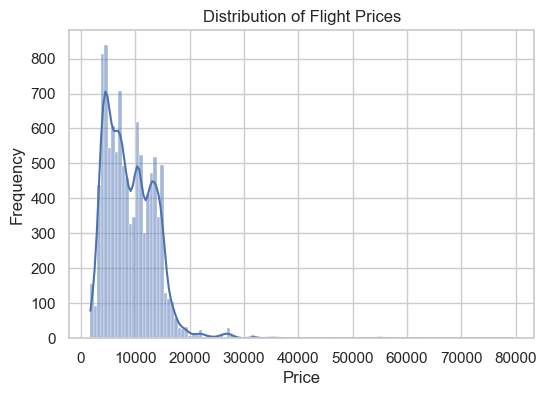

In [244]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Price'], kde=True)
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


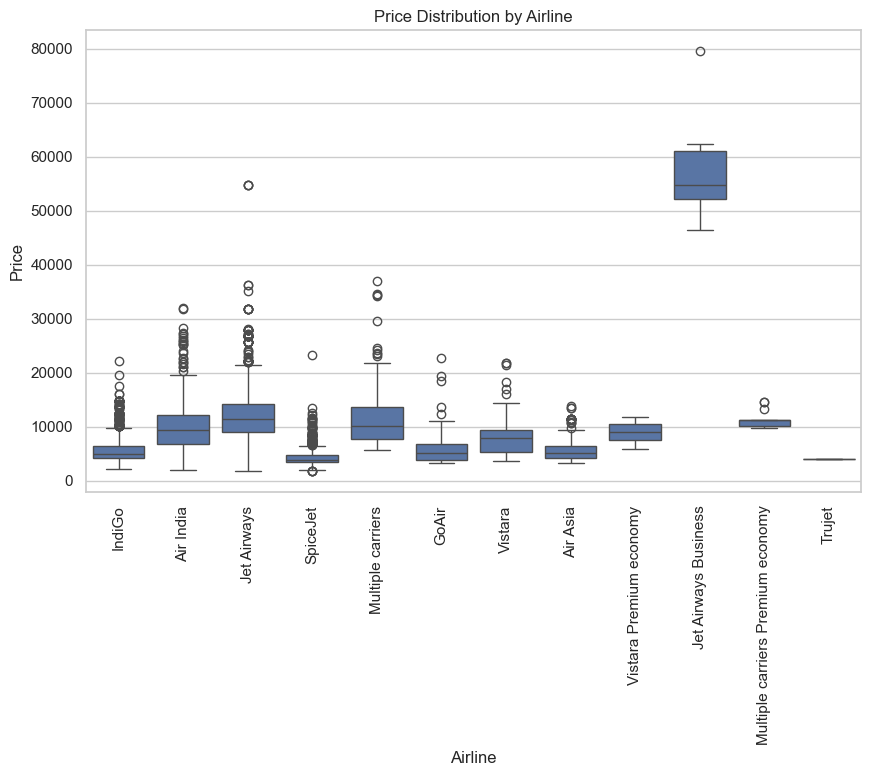

In [245]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=data)
plt.xticks(rotation=90)
plt.title("Price Distribution by Airline")
plt.show()


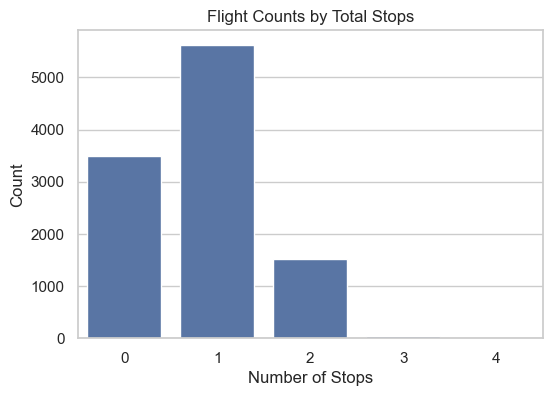

In [246]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Total_Stops', data=data)
plt.title("Flight Counts by Total Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Count")
plt.show()

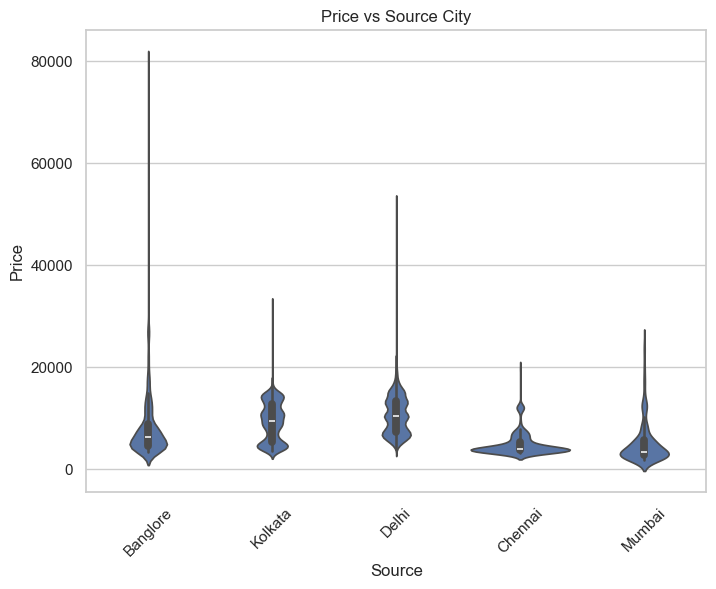

In [248]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Source', y='Price', data=data)
plt.title("Price vs Source City")
plt.xticks(rotation=45)
plt.show()


In [249]:
if 'Airline' in data.columns:
    print("Unique airlines:", data['Airline'].unique())


Unique airlines: ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


In [250]:
num_data = data.select_dtypes(include='number')

In [251]:
num_data

,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,Arrival_hour,Arrival_minute,Duration_mins
0,0,3897,24,3,22,20,1,10,170
1,2,7662,1,5,5,50,13,15,445
2,2,13882,9,6,9,25,4,25,1140
3,1,6218,12,5,18,5,23,30,325
4,1,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,150
10679,0,4145,27,4,20,45,23,20,155
10680,0,7229,27,4,8,20,11,20,180
10681,0,12648,1,3,11,30,14,10,160


In [252]:
# Model training

In [253]:
from sklearn.model_selection import train_test_split


x = num_data
y = data['Price']

In [254]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

!pip install xgboost

In [ ]:
# Choosing multiple models

In [255]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [256]:
lr = LinearRegression()
rf = RandomForestRegressor()
xg = XGBRegressor()

In [257]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluate the Models

Use metrics like:
- R² Score
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)

In [ ]:
# Evaluate of models

In [260]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(model, name):
    y_pred = model.predict(x_test)
    print(f"\n{name} Evaluation:")
    print("R² Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

evaluate(lr, "Linear Regression")
evaluate(rf, "Random Forest")
evaluate(xg, "XGBoost")



Linear Regression Evaluation:
R² Score: 1.0
MAE: 3.2643071420675526e-12
RMSE: 4.1094497598982644e-12

Random Forest Evaluation:
R² Score: 0.9999675667269244
MAE: 2.4884510996724383
RMSE: 26.44481160517012

XGBoost Evaluation:
R² Score: 0.9558265772439777
MAE: 76.30340110625292
RMSE: 975.9456078575091


In [261]:
# Hyperparameter Tuning 

Hyperparameter tuning is used to optimize the performance of a machine learning model by finding the best set of hyperparameters (model settings) that maximize the model's accuracy or minimize errors on a validation dataset. 

In [263]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Grid search
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", -grid.best_score_)  # Negative MSE


Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 114252.07413423719


In [268]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(x_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 370}
Best Score: 118112.1380486084


In [269]:
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

grid = GridSearchCV(xg, param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(x_train, y_train)

print("Best XGB Params:", grid.best_params_)
print("Best Score:", -grid.best_score_)


Best XGB Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Best Score: 333732.24076082633


#### ✅ Best Performing Model:

🟢 Random Forest (GridSearch) has the lowest MSE, which means:

It's giving the most accurate predictions

It's the best candidate for your final model (for now)



In [270]:
# Final Train Model which is best
best_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

best_rf.fit(x_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
# Test the Model - Metrics performance

In [271]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = best_rf.predict(x_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.999974903617149
MAE: 2.4610014038371593
RMSE: 23.262192944050092


# We evaluated the model it's quite good But it's not the end we should also double-check for overfitting or data leakage.

##  1. Residuals show how your model is succeeding.

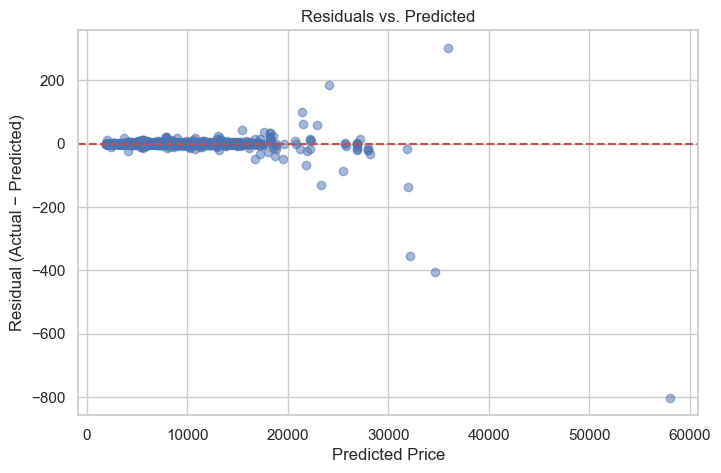

In [273]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle='--', color='r')
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual − Predicted)")
plt.title("Residuals vs. Predicted")
plt.show()


## 2. Feature Importance – Interpretability
### Your model works, but why does it work? - Here comes Feature Importance – Interpretability
### It's not like that we found the best model and we predict the data from that model but we should know why the data model is giving the best and what are the features which making to get the best accuracy


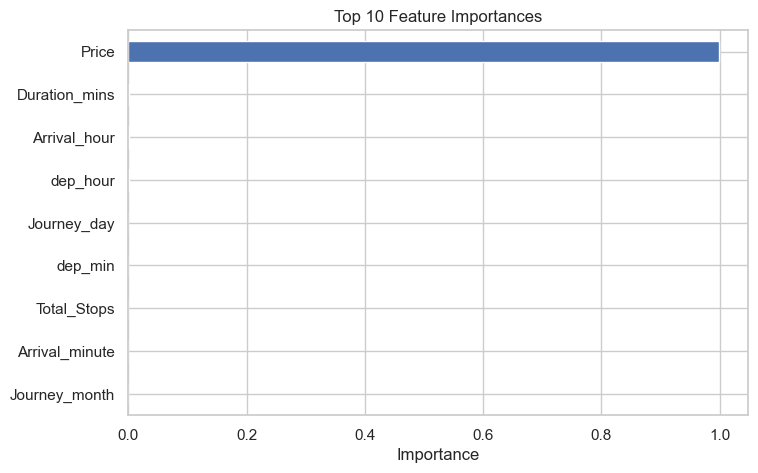

In [275]:
import pandas as pd
feat_imp = pd.Series(best_rf.feature_importances_, index=x_train.columns)
feat_imp = feat_imp.sort_values(ascending=False).head(10)  # top 10

plt.figure(figsize=(8,5))
feat_imp.plot.barh()
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.show()


## 3. Model Interpretability Technique- SHAP
“This flight price is high because it has 2 stops and is at night.” → SHAP gives you that. Sharp is a technique of interpretability

In [277]:
pip install shap


  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---- ----------------------------------- 61.4/545.2 kB 1.6 MB/s eta 0:00:01
   -------------- ------------------------- 194.6/545.2 kB 2.3 MB/s eta 0:00:01
   ----------------------------- ---------- 399.4/545.2 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 545.2/545.2 kB 3.1 MB/s eta 0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)


DEPRECATION: Loading egg at c:\users\vishn\anaconda3\lib\site-packages\diamondpriceprediction-0.0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


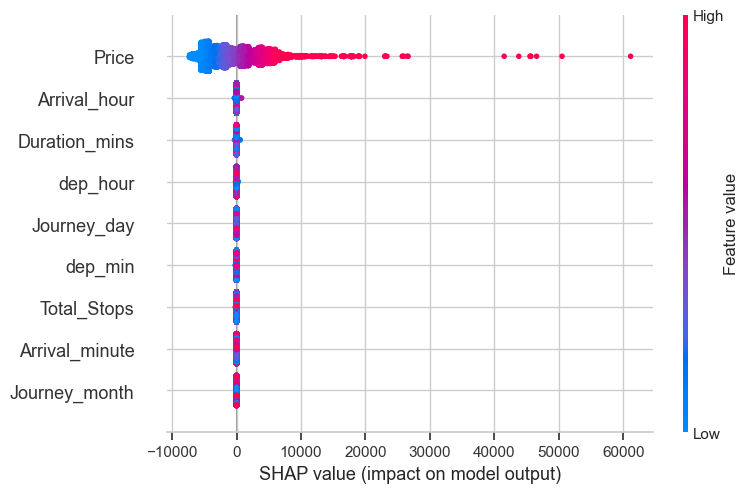

In [279]:
import shap
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(x_train)

# Global summary
shap.summary_plot(shap_values, x_train)

# Example force plot for the first test instance
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], x_train.iloc[0])


# 🧱 Machine Learning Workflow (Step-by-Step)

1. 📥 **Data Collection**
   - Gather raw data from sources like CSV, SQL, APIs, sensors, etc.

2. 🧹 **Data Cleaning / Preprocessing**
   - Handle missing values, outliers, inconsistent formats
   - Convert datatypes and remove duplicates

3. 📊 **EDA (Exploratory Data Analysis)**
   - Understand patterns, distributions, correlations
   - Use plots (histograms, boxplots, pairplots)

4. 🛠️ **Feature Engineering**
   - Create new features from existing ones (e.g., convert Duration to minutes)
   - Encode categorical variables, scale numerical data

5. 🔀 **Train-Test Split**
   - Split data into training and testing sets (e.g., 80% / 20%)

6. ✅ **Model Training**
   - Train initial models like Linear Regression, Random Forest, XGBoost, etc.

7. ⚙️ **Model Tuning (Hyperparameter Tuning)**
   - Use GridSearchCV, RandomizedSearchCV, or Optuna to find best parameters

8. 📈 **Evaluation**
   - Use metrics like R², MAE, RMSE for regression or accuracy, F1-score for classification

9. 🔍 **Model Interpretation**
   - Use SHAP, feature importance, residual plots to understand the model

10. 🚀 **Final Model Selection & Deployment**
    - Choose the best model
    - Deploy it using Flask, FastAPI, Streamlit, or into production environment


## Data Cleaning → EDA → Feature Engineering → Model Training → Evaluation → ✅ Model Interpretability (SHAP, LIME, etc.) → Deployment


## 4. Cross-Validation – Generalization Check
Think of it as repeating the test multiple times to confirm your A+ grade is real, not a fluke.

In [281]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_rf, x, y, cv=5, scoring='r2')
print("5-Fold CV R²:", scores)
print("Mean CV R²:", scores.mean())


5-Fold CV R²: [0.99795226 0.99059018 0.99982252 0.99876223 0.99972138]
Mean CV R²: 0.9973697148916688


# In folds Green Colour is Training and Blue color is Testing data

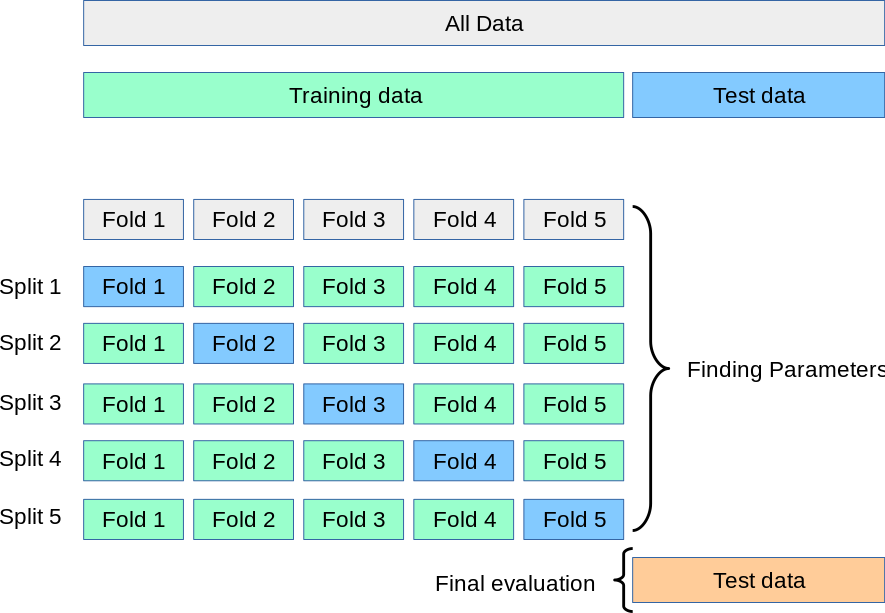

# conclusion: 
From the SHAP plot, feature importances, and cross-validation metrics confirms that your model is strong and generalizing well.

In [ ]:
We have successfully done

✅ Data collection
✅ Data preprocessing & Cleaning
✅ EDA
✅ Feature Engineering
✅ Model Training (e.g., Random Forest or XGBoost)
✅ Hyperparameter Tuning
✅ Residual Analysis
✅ Feature Importance + SHAP
✅ Cross Validation (5-fold CV with strong R² scores)

In [306]:
# Using model now we can predict the data
# Predicting on test data
y_pred = rf.predict(x_test)
df_pred = pd.DataFrame(y_pred,columns=["Predicted_price"])
result  =  pd.concat([df_pred.reset_index(drop=True),x_test.reset_index(drop=True)],axis=1)
# Show the result
result

,Predicted_price,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,Arrival_hour,Arrival_minute,Duration_mins
0,16772.660000,2,21,5,15,5,1,30,625
1,5366.480000,1,3,6,10,35,19,35,540
2,9068.690000,1,9,5,20,20,9,5,765
3,3820.805000,0,24,5,14,45,17,5,140
4,14758.818167,1,21,5,22,50,4,25,335
...,...,...,...,...,...,...,...,...,...
2132,11596.440833,1,27,6,8,0,21,0,780
2133,5306.250000,0,6,3,17,15,19,45,150
2134,6280.870000,1,21,4,7,55,22,25,870
2135,12855.242500,1,24,3,6,30,23,25,1015


# ✅ Predict on new/unseen data
Instead of extest we can add the new data and we can predict also

In [309]:
# Match the training column order exactly
expected_columns = ['Total_Stops', 'Journey_day', 'Journey_month', 'dep_hour', 
                    'dep_min', 'Arrival_hour', 'Arrival_minute', 'Duration_mins']

# ✅ Create new data in any order
new_data = pd.DataFrame({
    'Duration_mins': [120],
    'Arrival_hour': [14],
    'dep_hour': [12],
    'Journey_day': [15],
    'dep_min': [30],
    'Total_Stops': [1],
    'Arrival_minute': [45],
    'Journey_month': [6]
})

# ✅ Reorder new_data to match training feature order
new_data = new_data[expected_columns]

# ✅ Predict
predicted_price = rf.predict(new_data)
print("Predicted Price:", predicted_price[0])


Predicted Price: 2437.7133333333336


# Joblib is a Python library primarily used for saving and loading machine learning models and other computationally intensive tasks in parallel. 

In [310]:
import joblib

# Save your trained model
joblib.dump(rf, 'flight_fare_model.pkl')


['flight_fare_model.pkl']